In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import urllib.request

def import_data(num_weeks, last_week=210904):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    
    week_nums = [last_week]
    current_date = last_week
    
    import datetime
    for i in range(num_weeks):
        # make a date object for current week, subtract a week from it, assign that to
        # current week, reformat, and append to week_nums list
        date = datetime.date(int('20'+str(current_date)[:2]),int(str(current_date)[2:4]), int(str(current_date)[-2:]))
        date2 = date - datetime.timedelta(days=7)
        current_date = str(date2)[2:4]+str(date2)[5:7]+str(date2)[-2:]
        week_nums.append(current_date)

    for week_num in week_nums:
        urllib.request.urlretrieve(f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{week_num}.txt",
                                   f"EDA_data/turnstile_{week_num}.txt")

# Importing Data, Don't Repeat

In [3]:
# import_data(12)

In [4]:
# Run this in command line in EDA_data folder
#  head -1 turnstile_210313.txt > all_combined.csv
#  tail -n +2 -q *.txt >> all_combined.csv

In [5]:
path = 'EDA_data/'
data_path = path+'all_combined.csv'

# SQLAlchemy EDA

In [6]:
from sqlalchemy import create_engine

engine = create_engine("sqlite:///"+path+"mta.db")

In [7]:
all_data = pd.read_sql('SELECT * FROM mta_data;', engine)

In [8]:
all_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,00:00:00,REGULAR,7581941,2591624
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,04:00:00,REGULAR,7581950,2591625
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,08:00:00,REGULAR,7581954,2591635
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,12:00:00,REGULAR,7582009,2591655
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,16:00:00,REGULAR,7582124,2591683


In [9]:
# List Unique Turnstiles
pd.read_sql('SELECT CA||UNIT||SCP AS turnstile ' +
            'FROM mta_data GROUP BY turnstile', engine).head(10)

,turnstile
0,A002R05102-00-00
1,A002R05102-00-01
2,A002R05102-03-00
3,A002R05102-03-01
4,A002R05102-03-02
5,A002R05102-03-03
6,A002R05102-03-04
7,A002R05102-03-05
8,A002R05102-03-06
9,A002R05102-05-00


In [10]:
# Count Turnstiles
pd.read_sql('SELECT COUNT(*) AS NUM_TURNSTILES FROM ' +
            '(SELECT CA||UNIT||SCP AS turnstile ' +
            'FROM mta_data AS UNIQUE_TURNSTILES GROUP BY turnstile)', engine).head(10)

,NUM_TURNSTILES
0,5030


In [11]:
# Count Stations
pd.read_sql('SELECT COUNT(*) AS NUM_STATIONS FROM ' +
            '(SELECT STATION ' +
            'FROM mta_data AS UNIQUE_STATIONS GROUP BY STATION)', engine).head(10)

,NUM_STATIONS
0,379


In [12]:
# List Stations with the most Turnstiles
pd.read_sql('SELECT STATION, COUNT(turnstile) AS NUM_TURNSTILES FROM ' +
            '(SELECT STATION, CA||UNIT||SCP AS turnstile ' +
            'FROM mta_data AS UNIQUE_TURNSTILES GROUP BY turnstile) GROUP BY STATION ORDER BY NUM_TURNSTILES DESC', engine).head(10)

,STATION,NUM_TURNSTILES
0,34 ST-PENN STA,102
1,FULTON ST,96
2,GRD CNTRL-42 ST,94
3,23 ST,73
4,86 ST,65
5,CANAL ST,58
6,59 ST,56
7,CHAMBERS ST,55
8,34 ST-HERALD SQ,54
9,ATL AV-BARCLAY,51


In [13]:
# List some irregular audits
pd.read_sql('SELECT * ' + 
            'FROM mta_data ' +
            'WHERE DESC != "REGULAR"', engine).head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A014,R081,02-00-00,49 ST,NQRW,BMT,06/06/2021,12:00:00,RECOVR AUD,52754,26206
1,A014,R081,02-00-00,49 ST,NQRW,BMT,06/07/2021,00:00:00,RECOVR AUD,52955,26282
2,A014,R081,02-00-00,49 ST,NQRW,BMT,06/07/2021,08:00:00,RECOVR AUD,52983,26336
3,A014,R081,02-00-00,49 ST,NQRW,BMT,06/07/2021,12:00:00,RECOVR AUD,53027,26387
4,A014,R081,02-00-00,49 ST,NQRW,BMT,06/07/2021,16:00:00,RECOVR AUD,53126,26422
5,A014,R081,02-00-00,49 ST,NQRW,BMT,06/08/2021,08:00:00,RECOVR AUD,53366,26528
6,A014,R081,02-00-00,49 ST,NQRW,BMT,06/08/2021,12:00:00,RECOVR AUD,53403,26582
7,A014,R081,02-00-00,49 ST,NQRW,BMT,06/08/2021,16:00:00,RECOVR AUD,53500,26620
8,A014,R081,02-00-00,49 ST,NQRW,BMT,06/08/2021,20:00:00,RECOVR AUD,53707,26670
9,A014,R081,02-00-00,49 ST,NQRW,BMT,06/09/2021,12:00:00,RECOVR AUD,53795,26785


In [14]:
# List stations with most irregular audits
pd.read_sql('SELECT STATION, COUNT(*) AS NUM_IRREGS ' + 
            'FROM mta_data ' +
            'WHERE DESC != "REGULAR" ' + 
            'GROUP BY STATION ' +
            'HAVING NUM_IRREGS > 1 '+
            'ORDER BY NUM_IRREGS DESC', engine).head(10)

,STATION,NUM_IRREGS
0,FLUSHING-MAIN,735
1,AVENUE H,533
2,CHAMBERS ST,487
3,SUTTER AV-RUTLD,420
4,168 ST,371
5,72 ST,346
6,174 ST,301
7,34 ST-PENN STA,296
8,15 ST-PROSPECT,291
9,KEW GARDENS,285


In [15]:
# List times of irregular audits and frequencies
pd.read_sql('SELECT CASE WHEN TIME="00:00:00" THEN "0:00" ' +
            'WHEN TIME="04:00:00" THEN "4:00" ' +
            'WHEN TIME="08:00:00" THEN "8:00" ' +
            'WHEN TIME="12:00:00" THEN "12:00" ' +
            'WHEN TIME="16:00:00" THEN "16:00" ' +
            'WHEN TIME="20:00:00" THEN "20:00" ' +
            'ELSE "OTHER" END AS TIME_PERIOD, '
            'COUNT(*) AS NUM_IRREGS ' + 
            'FROM mta_data ' +
            'WHERE DESC != "REGULAR" ' + 
            'GROUP BY TIME_PERIOD ' +
            'HAVING NUM_IRREGS > 1 '+
            'ORDER BY NUM_IRREGS DESC', engine).head(10)

,TIME_PERIOD,NUM_IRREGS
0,OTHER,5748
1,4:00,1394
2,8:00,1307
3,0:00,1306
4,12:00,1232
5,20:00,1174
6,16:00,1131


# Pandas EDA

In [16]:
df = pd.read_csv(data_path)
df_original = df.copy()

In [17]:
### subsample data ###
# df = df_original.loc[0:10000,:].copy()
# df.head()

In [18]:
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [19]:
df['turnstile'] = df['C/A'] +'.'+ df['UNIT'] +'.'+ df['SCP']
df.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,00:00:00,REGULAR,7581941,2591624,A002.R051.02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,04:00:00,REGULAR,7581950,2591625,A002.R051.02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,08:00:00,REGULAR,7581954,2591635,A002.R051.02-00-00


In [20]:
print('There are {} stations and {} turnstiles'.format(len(df.groupby('STATION').STATION.unique()),
                                                       len(df.groupby('turnstile').turnstile.unique())))

There are 379 stations and 5030 turnstiles


In [21]:
# Get an easier to work with time column 't' starting with making a date_time column
df['DATE_TIME'] = pd.to_datetime(df['DATE']+ ' '+ df['TIME'], format='%m/%d/%Y %H:%M:%S')
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,00:00:00,REGULAR,7581941,2591624,A002.R051.02-00-00,2021-06-05 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,04:00:00,REGULAR,7581950,2591625,A002.R051.02-00-00,2021-06-05 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,08:00:00,REGULAR,7581954,2591635,A002.R051.02-00-00,2021-06-05 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,12:00:00,REGULAR,7582009,2591655,A002.R051.02-00-00,2021-06-05 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,16:00:00,REGULAR,7582124,2591683,A002.R051.02-00-00,2021-06-05 16:00:00


## Remove Non-Regular Audits and Check for Duplicates (in time)

In [22]:
#remove irregular audits
old_len = len(df)
df = df[df.DESC=='REGULAR']
print('Removed {} Rows!'.format(old_len-len(df)))

#prove that there are no duplicates in time
df.groupby(['turnstile', 'STATION', 'LINENAME', 'DIVISION']
          ).DATE_TIME.value_counts().sort_values(ascending=False).head(3)

Removed 13292 Rows!


turnstile           STATION         LINENAME  DIVISION  DATE_TIME          
A002.R051.02-00-00  59 ST           NQR456W   BMT       2021-06-05 00:00:00    1
R138.R293.00-03-02  34 ST-PENN STA  123ACE    IRT       2021-06-05 06:00:00    1
                                                        2021-06-05 14:00:00    1
Name: DATE_TIME, dtype: int64

# Compute entries and exits per hour and make new time column with times in the middle of the rate computation window

In [23]:
df['dt2'] = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION',
                                'LINENAME', 'DIVISION'])['DATE_TIME'].transform(lambda x: x.shift(-1)-x)
df['DATE_TIME_adj'] = df.DATE_TIME - df.dt2/2

df.dropna(subset=['dt2'], inplace=True)
df.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile,DATE_TIME,dt2,DATE_TIME_adj
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,00:00:00,REGULAR,7581941,2591624,A002.R051.02-00-00,2021-06-05 00:00:00,0 days 04:00:00,2021-06-04 22:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,04:00:00,REGULAR,7581950,2591625,A002.R051.02-00-00,2021-06-05 04:00:00,0 days 04:00:00,2021-06-05 02:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,08:00:00,REGULAR,7581954,2591635,A002.R051.02-00-00,2021-06-05 08:00:00,0 days 04:00:00,2021-06-05 06:00:00


In [24]:
df['eph'] = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION',
                                'LINENAME', 'DIVISION'])['ENTRIES'].transform(lambda x: x.diff())/(df['dt2'] / (np.timedelta64(1,'h'))).astype(int)
df['exph'] = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION',
                                'LINENAME', 'DIVISION'])['EXITS'].transform(lambda x: x.diff())/(df['dt2'] / (np.timedelta64(1,'h'))).astype(int)
df.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile,DATE_TIME,dt2,DATE_TIME_adj,eph,exph
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,00:00:00,REGULAR,7581941,2591624,A002.R051.02-00-00,2021-06-05 00:00:00,0 days 04:00:00,2021-06-04 22:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,04:00:00,REGULAR,7581950,2591625,A002.R051.02-00-00,2021-06-05 04:00:00,0 days 04:00:00,2021-06-05 02:00:00,2.25,0.25
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,08:00:00,REGULAR,7581954,2591635,A002.R051.02-00-00,2021-06-05 08:00:00,0 days 04:00:00,2021-06-05 06:00:00,1.00,2.50


In [25]:
df[['DATE_TIME', 'DATE_TIME_adj']].head(3)

,DATE_TIME,DATE_TIME_adj
0,2021-06-05 00:00:00,2021-06-04 22:00:00
1,2021-06-05 04:00:00,2021-06-05 02:00:00
2,2021-06-05 08:00:00,2021-06-05 06:00:00


## Remove Rows with NaNs or infs in eph and exph

In [26]:
old_len = len(df)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['eph','exph'],inplace=True)
print('Removed {} NaNs!'.format(old_len-len(df)))
print('Num NaN in exph: {}'.format(df.exph.isna().sum()))
print('Num NaN in eph: {}'.format(df.eph.isna().sum()))

Removed 12958 NaNs!
Num NaN in exph: 0
Num NaN in eph: 0


# Show issues in Data

In [27]:
bad_turnstiles = pd.Series(df.turnstile.unique()[df.groupby('turnstile').eph.apply(
    lambda x: True if (np.all(x==0) or x.min()<0 or x.max()>10000) else False)==True])
print(f'df.shape: {df.turnstile.shape}')
print(f'bad_turnstiles.shape: {bad_turnstiles.shape}')

df.shape: (2691537,)
bad_turnstiles.shape: (486,)


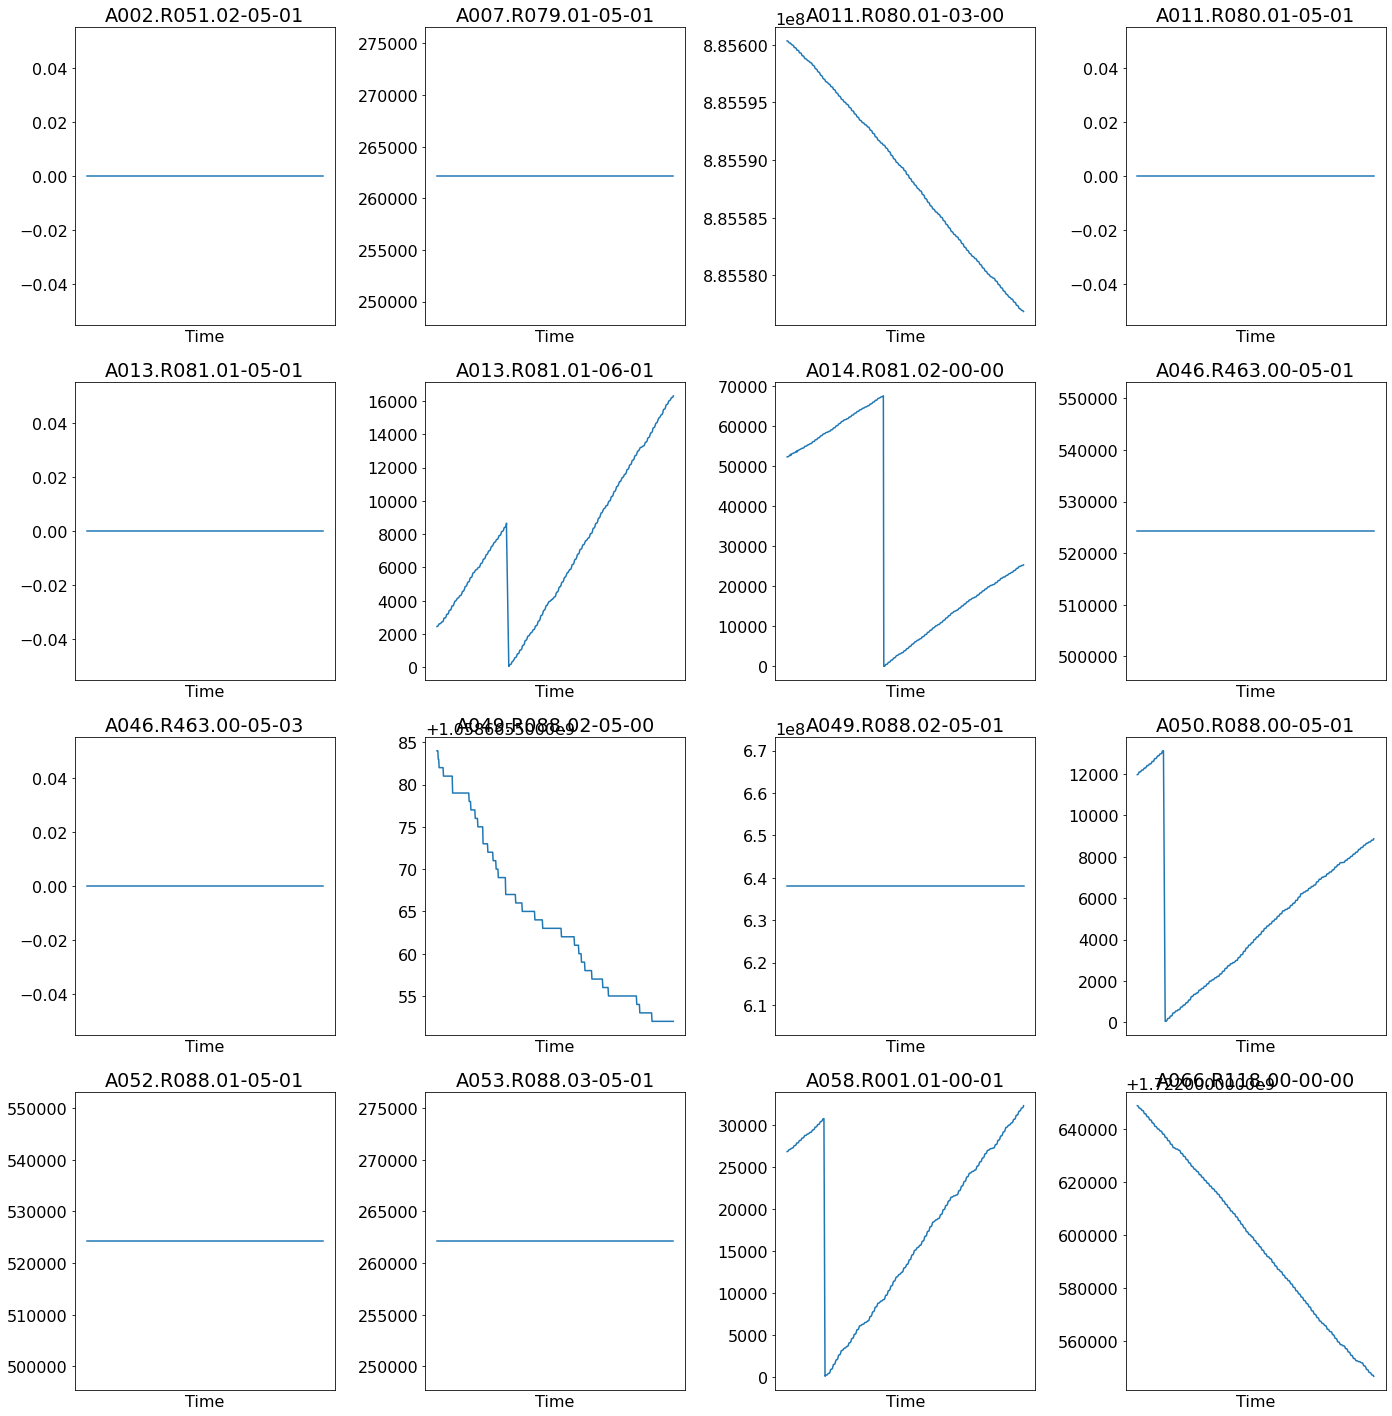

In [28]:
# plot bad turnstiles

#change this to cycle through sets
start_ = 0

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,20))
N=16 #number of subplots
for i in range(start_,start_+N):
    mask = (df.turnstile==bad_turnstiles.iloc[i])
    plt.subplot(int(np.sqrt(N)),int(np.sqrt(N)),(i+1-start_))
    plt.plot(df[mask].DATE_TIME_adj, df[mask].ENTRIES)
    plt.tight_layout()
    plt.xlabel('Time')
    plt.xticks([])
    plt.ticklabel_format(axis='y',style='sci')
    plt.title(df[mask].turnstile.iloc[0])
# plt.savefig('bad_turnstiles_ex.png', dpi=300)

# Make rates positive to fix turnstiles counting backwards

In [29]:
df['eph'] = df.eph.apply('abs')
df['exph'] = df.exph.apply('abs')
df.describe()

,ENTRIES,EXITS,dt2,eph,exph
count,2.691537e+06,2.691537e+06,2691537,2.691537e+06,2.691537e+06
mean,4.164288e+07,3.330076e+07,0 days 04:02:37.641876741,4.765189e+02,1.125731e+03
std,2.183687e+08,1.919598e+08,0 days 01:46:55.489231610,2.990622e+05,6.268353e+05
min,0.000000e+00,0.000000e+00,0 days 01:00:06,0.000000e+00,0.000000e+00
25%,2.186500e+05,1.009290e+05,0 days 04:00:00,1.000000e+00,1.500000e+00
50%,1.405430e+06,8.570400e+05,0 days 04:00:00,6.750000e+00,7.500000e+00
75%,6.012870e+06,3.971686e+06,0 days 04:00:00,2.100000e+01,2.250000e+01
max,2.147415e+09,2.133797e+09,48 days 04:23:19,3.457776e+08,5.334352e+08


# Clean Data

In [30]:
def deep_clean(df, cutoff_factor=5):
    # this has a lot of room for optimization
    
    df['median_exph'] = df.groupby('turnstile').exph.transform('median')
    df['IQR_exph'] = df.groupby('turnstile').exph.transform(lambda x: 
                                                                  np.percentile(x, q=75)-np.percentile(x, 25))
    # Replace values that are >cutoff_factor*IQR times the median rate with nan
    exph_clean = np.array(df['exph'].copy())
    for i, [exph, median_exph, iqr] in enumerate(np.array(df.loc[:,['exph', 'median_exph', 'IQR_exph']])):
        if exph > (median_exph+cutoff_factor*iqr):
            exph_clean[i] = np.nan
            
    df['exph_clean'] = exph_clean
    
    df['median_eph'] = df.groupby('turnstile').eph.transform('median')
    df['IQR_eph'] = df.groupby('turnstile').eph.transform(lambda x: 
                                                                  np.percentile(x, q=75)-np.percentile(x, 25))
    # Replace values that are >cutoff_factor*IQR times the median rate with nan
    eph_clean = np.array(df['eph'].copy())
    for i, [eph, median_eph, iqr] in enumerate(np.array(df.loc[:,['eph', 'median_eph', 'IQR_eph']])):
        if eph > (median_exph+cutoff_factor*iqr):
            eph_clean[i] = np.nan
            
    df['eph_clean'] = eph_clean
    #drop columns that are no longer needed
    df.drop(['median_exph', 'median_eph', 'IQR_exph', 'IQR_eph'], axis=1, inplace=True, errors='ignore')
    #drop nan's and print how much was dropped
    old_len=len(df)
    df.dropna(inplace=True)
    print("{} rows dropped ({}% of data)".format(old_len-len(df), 100*(old_len-len(df))/old_len))
    return df

In [31]:
df = deep_clean(df)
df.describe()

30811 rows dropped (1.144736260359787% of data)


,ENTRIES,EXITS,dt2,eph,exph,exph_clean,eph_clean
count,2.660726e+06,2.660726e+06,2660726,2.660726e+06,2.660726e+06,2.660726e+06,2.660726e+06
mean,4.174512e+07,3.346446e+07,0 days 04:02:37.224966043,1.522048e+01,1.765727e+01,1.765727e+01,1.522048e+01
std,2.187559e+08,1.924579e+08,0 days 01:46:56.946212914,2.143868e+01,2.709216e+01,2.709216e+01,2.143868e+01
min,0.000000e+00,0.000000e+00,0 days 01:00:06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.263778e+05,1.052580e+05,0 days 04:00:00,1.000000e+00,1.500000e+00,1.500000e+00,1.000000e+00
50%,1.434640e+06,8.756960e+05,0 days 04:00:00,6.750000e+00,7.750000e+00,7.750000e+00,6.750000e+00
75%,6.068112e+06,4.020274e+06,0 days 04:00:00,2.100000e+01,2.250000e+01,2.250000e+01,2.100000e+01
max,2.147415e+09,2.122881e+09,48 days 04:23:19,3.790000e+02,7.640000e+02,7.640000e+02,3.790000e+02


In [32]:
# add total entries + exits per hour column
df['tot_ph'] = df['eph_clean']+df['exph_clean']

# Find busiest day of the week and time of the day

In [33]:
# add weekday column
df['weekday'] = df.DATE_TIME_adj.dt.weekday

In [34]:
# busiest time of day
def bin_time(time):
    if time.hour>=21:
        return '9pm - midnight'
    elif time.hour>=18:
        return '6pm - 9pm'
    elif time.hour>=15:
        return '3pm - 6pm'
    elif time.hour>=12:
        return 'noon - 3pm'
    elif time.hour>=9:
        return '9am - noon'
    elif time.hour>=6:
        return '6am - 9am'
    elif time.hour>=3:
        return '3am - 6am'
    else:
        return 'midnight - 3am'

df['tod'] = df.DATE_TIME_adj.apply(bin_time)
df[df['weekday']==2].groupby(['tod'],as_index=False).tot_ph.agg('median').sort_values('tot_ph',ascending=False).head(20)

,tod,tot_ph
3,6pm - 9pm,49.50
1,3pm - 6pm,43.75
7,noon - 3pm,39.00
4,9am - noon,37.50
2,6am - 9am,28.25
5,9pm - midnight,15.25
6,midnight - 3am,3.00
0,3am - 6am,2.25


In [35]:
# fix order of time of day
tods = list(df['tod'].unique())
tods = [tods[i] for i in [0,6,1,2,3,7,4,5]]
print(tods)

['midnight - 3am', '3am - 6am', '6am - 9am', '9am - noon', 'noon - 3pm', '3pm - 6pm', '6pm - 9pm', '9pm - midnight']


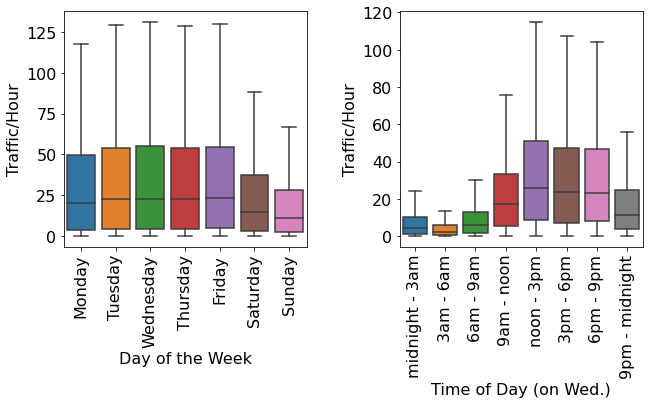

In [36]:
#plot traffic vs day of the week and time of the day

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plt.tight_layout(pad=3)

g = sns.boxplot(ax=ax[0], x="weekday", y="tot_ph",
                 showfliers=False, data=df)
g.set_xticklabels(['Monday', 'Tuesday', 'Wednesday',
                    'Thursday', 'Friday', 'Saturday', 
                    'Sunday'], rotation=90);

g2 = sns.boxplot(ax=ax[1], x="tod", y="tot_ph", 
                showfliers=False, data=df[(df.weekday==6)],
               order=tods)
g2.set_xticklabels(tods,rotation=90);


# fig.suptitle('Busiest Day of the Week and Time of Day')
ax[0].set_xlabel('Day of the Week')
ax[0].set_ylabel('Traffic/Hour')
ax[1].set_xlabel('Time of Day (on Wed.)')
ax[1].set_ylabel('Traffic/Hour');
plt.savefig('busiest_day_and_time.png', dpi=600, bbox_inches='tight')

# Find Busiest Stations

In [37]:
# Compute median traffic per turnstile per time of day
turnstile_meds = df.groupby(['STATION', 'turnstile', 'weekday', 'tod'], as_index=False).agg('median').copy()
turnstile_meds.head(3)

,STATION,turnstile,weekday,tod,ENTRIES,EXITS,eph,exph,exph_clean,eph_clean,tot_ph
0,1 AV,H007.R248.00-00-00,0,6am - 9am,15594329.0,17933860.0,5.25,104.75,104.75,5.25,110.00
1,1 AV,H007.R248.00-00-00,0,6pm - 9pm,15594691.0,17935404.0,44.75,97.50,97.50,44.75,141.00
2,1 AV,H007.R248.00-00-00,0,9am - noon,15594394.0,17934520.0,18.00,167.25,167.25,18.00,184.75


In [38]:
# Sum over turnstiles to get median traffic per station per time of day
df_station = turnstile_meds[['STATION', 'weekday', 'tod', 'tot_ph']].groupby(['STATION', 'weekday', 'tod'], as_index=False
                       )[['tot_ph']].agg('sum').copy()
df_station.head(3)

,STATION,weekday,tod,tot_ph
0,1 AV,0,3pm - 6pm,0.00
1,1 AV,0,6am - 9am,543.75
2,1 AV,0,6pm - 9pm,1481.75


In [39]:
# List top stations by median traffic during wednesday afternoon/evening
busy_mask = (((df_station.tod=='noon - 3pm')|(df_station.tod=='3pm - 6pm')|
              (df_station.tod=='6pm - 9pm')) & (df_station.weekday==2))
top_stations = df_station[busy_mask].groupby(['STATION'],as_index=False
                                              ).tot_ph.agg('median'
                                                                ).sort_values('tot_ph',ascending=False)
top_stations.head(10)

,STATION,tot_ph
61,34 ST-PENN STA,6048.0000
59,34 ST-HERALD SQ,5105.5000
14,14 ST-UNION SQ,5060.1250
353,TIMES SQ-42 ST,4255.2500
85,59 ST,3631.5000
217,FLUSHING-MAIN,3459.1875
68,42 ST-PORT AUTH,3372.7500
86,59 ST COLUMBUS,3345.7500
110,86 ST,3176.7500
226,FULTON ST,3108.3750


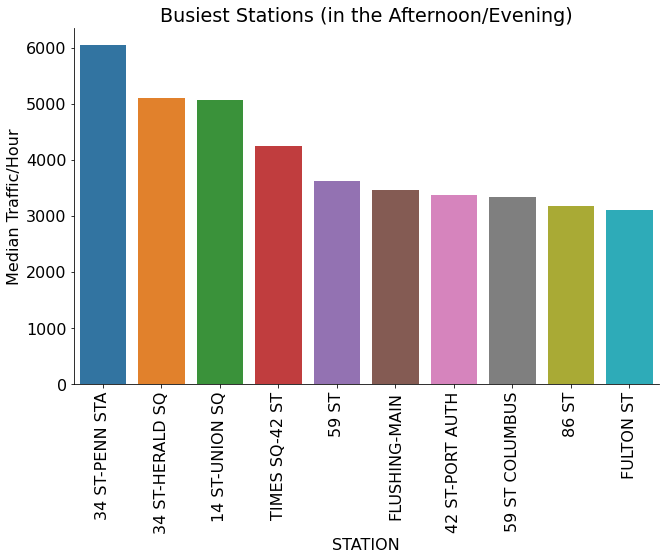

In [40]:
plt.rcParams.update({'font.size': 16})
ax = sns.catplot(x='STATION', y='tot_ph', kind='bar', data=top_stations.head(10), 
               height=6, aspect=1.62, );
(ax.set_xticklabels(rotation=90)
 .set(ylabel='Median Traffic/Hour', title='Busiest Stations (in the Afternoon/Evening)')
 .savefig(fname='top_stations_bar_chart2.png', dpi=300)
)